# 仮想環境の構築


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [18]:
import matplotlib
import matplotlib.animation as anm
matplotlib.use("nbagg")

In [19]:
import math 
import matplotlib.patches as patches 

In [101]:
class VWorld:
    def __init__(self,debug):
        self.objects= []
        self.debug =debug
        
    def append(self,obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(111)
        ax.set_aspect("equal")
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X",fontsize =20)
        ax.set_ylabel("Y",fontsize =20)
        
        elems = []
        
        if(self.debug):
            for i in range(1000):
                self.one_step(i,elems,ax)
        else:
            self.ani = anm.FuncAnimation(fig,self.one_step,fargs=(elems,ax),frames =10,interval =1000,repeat=False)
            plt.show()
    
   
    def one_step(self,i,elems,ax):
    """
        ## 一秒ごとにロボットがどのように変化するか
            
            1. 配列 elems からpop した値を除去する
            2. 経過時間を再描写
            3. 移動したロボットの位置を描写
    
    """
        
        while elems: 
            elems.pop().remove()
        
        #  経過時間を入力
        elems.append(ax.text(-4.4,4.5,"t="+str(i),fontsize=10))   
        for obj in self.objects:
            obj.draw(ax,elems)
            

<IPython.core.display.Javascript object>


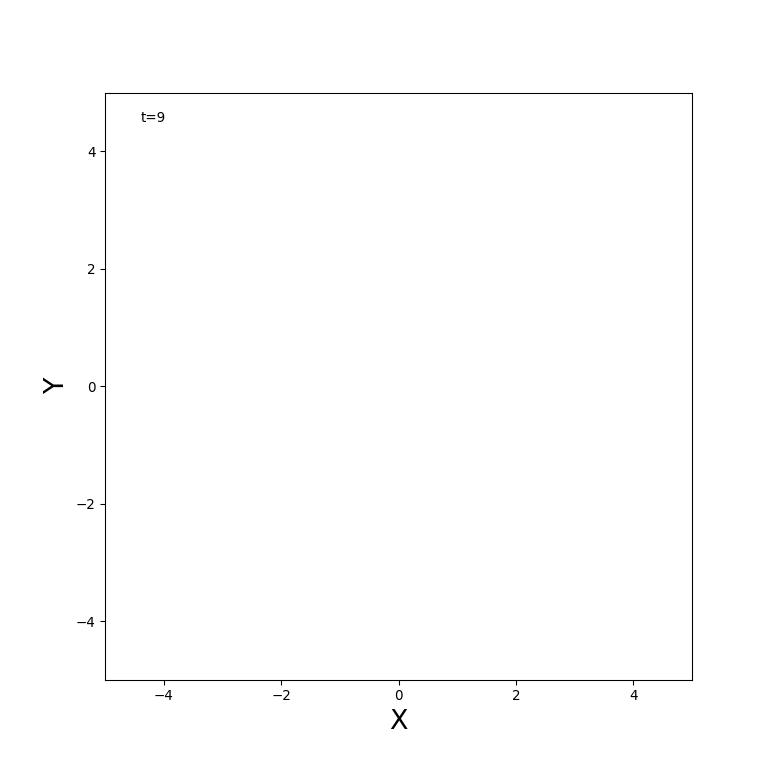

In [102]:
world =VWorld(False)
world.draw()

In [104]:
class VRobot:
    def __init__(self,pose,agent,color="black"):
        self.pose = pose
        self.r = 0.2
        self.color = color
        self.agent = agent
        self.poses = [pose]
        
    def draw(self,ax,elems):
        x,y,theta = self.pose
        
        xn = x + self.r * math.cos(theta)
        yn = y + self.r * math.sin(theta)
        
        self.poses.append(self.pose)
        
        elems+= ax.plot([x,xn],[y,yn],color =self.color)
        
        # ロボットの車体を描写
        c= patches.Circle(xy=(x,y), radius = self.r, fill=False, color =self.color)
        elems.append(ax.add_patch(c))
    
    
    @classmethod
    def state_transition(cls,nu,omega, time,pose):
        
        t0= pose[2]
        
        # 三項演算子 で実装したら、もっとシンプルに実装できる
        if(math.fabs(omega)<1e-10):
            return pose + np.array([nu*math.cos(t0),nu*math.sin(t0),omega])*time
        else:
            return pose + np.array([
                nu/omega*(math.sin(t0+omega*time)-math.sin(t0)),
                nu/omega*(math.cos(t0+omega*time)-math.cos(t0)),
                omega*time
            ])
    

In [107]:
VRobot.state_transition(0.1,0.0,1.0,np.array([0,0,0]).T)

array([0.1, 0. , 0. ])

In [108]:
VRobot.state_transition(0.1,10.0/180*math.pi,9.0,np.array([0,0,0]).T)

array([ 0.5729578 , -0.5729578 ,  1.57079633])

In [109]:
VRobot.state_transition(0.1,10.0/180*math.pi,18.0,np.array([0,0,0]).T)

array([ 7.01670930e-17, -1.14591559e+00,  3.14159265e+00])

<IPython.core.display.Javascript object>


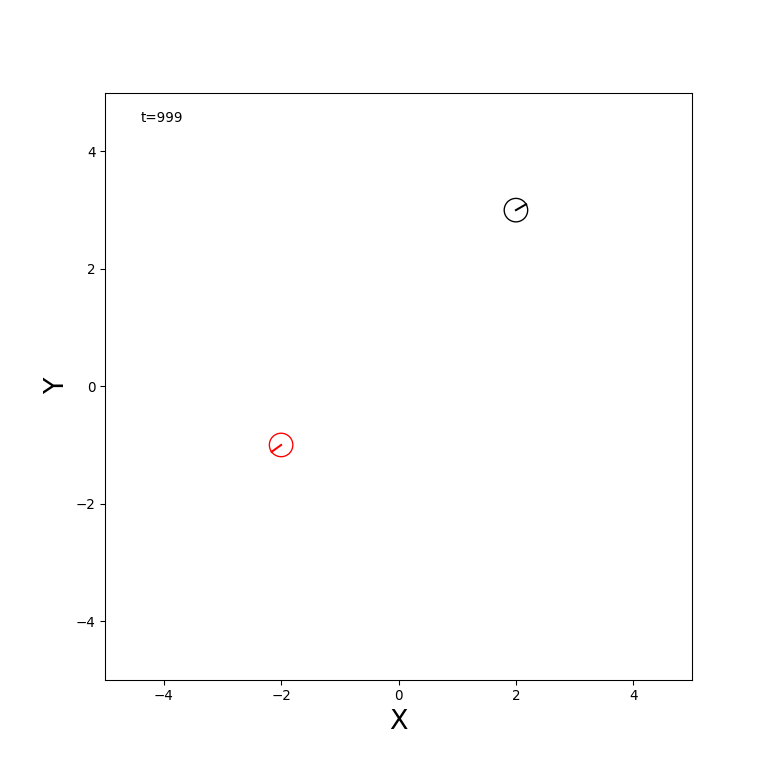

In [110]:
world2 =VWorld(True)

robot1= VRobot(np.array([2,3,math.pi/6]).T)
robot2= VRobot(np.array([-2,-1,math.pi/5*6]).T, color ="red")

world2.append(robot1)
world2.append(robot2)
world2.draw()

In [ ]:

class Agent:
    
    """
    ## ロボットを制御指令を出すクラス
    
    このクラスが、ロボットをどのように動かすかを指令する、
    人工知能の研究分野で、この部分を「エージェントと呼ぶ」
    """
    
    def __init__(self,nu,omega):
        self.nu = nu
        self.omega =omega
    
    def decision(self.observation =None):
        return self.nu,self.omega
